In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dane_po_EDA.csv')

In [3]:
data.drop([data.columns[0]], axis=1, inplace=True)

In [4]:
data

,track,artist,album,artist pop,track pop,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,new genre
0,Desperado,Rihanna,ANTI (Deluxe),87,71,186466,0.680,0.609,-5.222,0.0440,0.323000,0.000000,0.1020,0.325,94.350,2016,pop
1,Empire State Of Mind,JAY-Z,The Blueprint 3,80,83,276920,0.491,0.956,-1.538,0.3920,0.029500,0.000000,0.4600,0.811,173.585,2009,hip hop
2,ARE WE STILL FRIENDS?,"Tyler, The Creator",IGOR,82,81,265480,0.216,0.497,-8.025,0.0371,0.128000,0.000002,0.1110,0.313,187.308,2019,hip hop
3,i love you,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",86,81,291796,0.421,0.131,-18.435,0.0382,0.952000,0.004530,0.1090,0.120,137.446,2019,pop
4,Bohemian Rhapsody - Remastered 2011,Queen,A Night At The Opera (2011 Remaster),81,80,354320,0.411,0.404,-9.928,0.0511,0.271000,0.000000,0.3000,0.226,71.068,1975,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,My Sacrifice,Creed,Weathered,68,73,294600,0.320,0.880,-6.035,0.0504,0.000101,0.000004,0.0760,0.257,146.349,2001,metal
2118,Hemorrhage (In My Hands),Fuel,Something Like Human,53,61,236866,0.301,0.823,-4.072,0.0433,0.000144,0.000309,0.0833,0.372,152.017,2000,metal
2119,A Beautiful Lie,Thirty Seconds To Mars,A Beautiful Lie,67,51,245306,0.479,0.929,-5.106,0.0921,0.002910,0.293000,0.1710,0.344,159.949,2005,rock
2120,Wake Me up When September Ends,Green Day,American Idiot,78,76,285653,0.546,0.814,-5.146,0.0314,0.023000,0.000000,0.0972,0.146,104.980,2004,rock


In [5]:
df = data.drop(columns=['track', 'album','artist'])

# One hot encoding 

In [6]:
encoded_data = pd.get_dummies(df, columns=['new genre'], drop_first=True, dtype=int)

In [7]:
encoded_data2 = pd.get_dummies(data, columns=['new genre'], drop_first=True, dtype=int)
encoded_data2.to_csv('spotify_data_encoded2.csv')

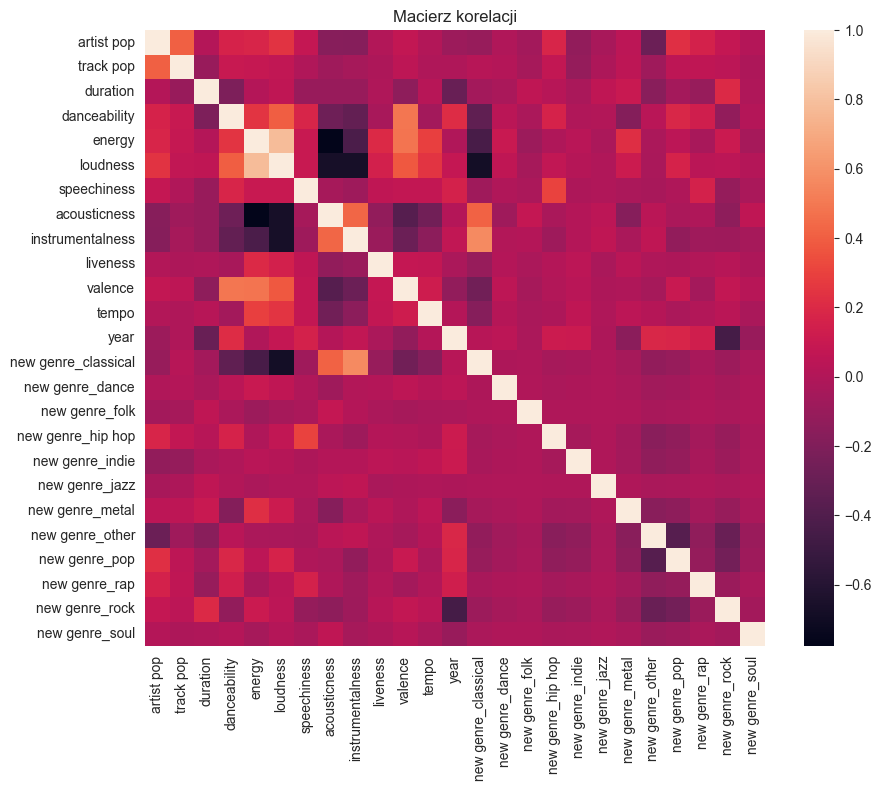

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(encoded_data.corr(), annot=False, fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

# Sprawdzenie skorelowanych kolumn 

In [9]:
def cor_features(df):
    highly_correlated_features = set()
    correlation_matrix = df.corr().abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] > 0.6:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                highly_correlated_features.add((colname_i, colname_j, correlation_matrix.iloc[i, j]))
    print("Pairs of highly correlated features:")
    for pair in highly_correlated_features:
        print(pair)

    return encoded_data

In [10]:
cor_features(encoded_data)

Pairs of highly correlated features:
('instrumentalness', 'loudness', 0.6734956210013407)
('acousticness', 'energy', 0.7778653706571921)
('loudness', 'energy', 0.7799460045774012)
('new genre_classical', 'loudness', 0.6819621263159126)
('acousticness', 'loudness', 0.6702157700395519)


,artist pop,track pop,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,new genre_folk,new genre_hip hop,new genre_indie,new genre_jazz,new genre_metal,new genre_other,new genre_pop,new genre_rap,new genre_rock,new genre_soul
0,87,71,186466,0.680,0.609,-5.222,0.0440,0.323000,0.000000,0.1020,...,0,0,0,0,0,0,1,0,0,0
1,80,83,276920,0.491,0.956,-1.538,0.3920,0.029500,0.000000,0.4600,...,0,1,0,0,0,0,0,0,0,0
2,82,81,265480,0.216,0.497,-8.025,0.0371,0.128000,0.000002,0.1110,...,0,1,0,0,0,0,0,0,0,0
3,86,81,291796,0.421,0.131,-18.435,0.0382,0.952000,0.004530,0.1090,...,0,0,0,0,0,0,1,0,0,0
4,81,80,354320,0.411,0.404,-9.928,0.0511,0.271000,0.000000,0.3000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,68,73,294600,0.320,0.880,-6.035,0.0504,0.000101,0.000004,0.0760,...,0,0,0,0,1,0,0,0,0,0
2118,53,61,236866,0.301,0.823,-4.072,0.0433,0.000144,0.000309,0.0833,...,0,0,0,0,1,0,0,0,0,0
2119,67,51,245306,0.479,0.929,-5.106,0.0921,0.002910,0.293000,0.1710,...,0,0,0,0,0,0,0,0,1,0
2120,78,76,285653,0.546,0.814,-5.146,0.0314,0.023000,0.000000,0.0972,...,0,0,0,0,0,0,0,0,1,0


In [11]:
columns_to_drop = ['instrumentalness', 'acousticness']
encoded_data.drop(columns=columns_to_drop, inplace=True)

In [12]:
target = encoded_data['track pop']
encoded_data.drop(columns='track pop', inplace=True)
encoded_data['target'] = target
encoded_data

,artist pop,duration,danceability,energy,loudness,speechiness,liveness,valence,tempo,year,...,new genre_hip hop,new genre_indie,new genre_jazz,new genre_metal,new genre_other,new genre_pop,new genre_rap,new genre_rock,new genre_soul,target
0,87,186466,0.680,0.609,-5.222,0.0440,0.1020,0.325,94.350,2016,...,0,0,0,0,0,1,0,0,0,71
1,80,276920,0.491,0.956,-1.538,0.3920,0.4600,0.811,173.585,2009,...,1,0,0,0,0,0,0,0,0,83
2,82,265480,0.216,0.497,-8.025,0.0371,0.1110,0.313,187.308,2019,...,1,0,0,0,0,0,0,0,0,81
3,86,291796,0.421,0.131,-18.435,0.0382,0.1090,0.120,137.446,2019,...,0,0,0,0,0,1,0,0,0,81
4,81,354320,0.411,0.404,-9.928,0.0511,0.3000,0.226,71.068,1975,...,0,0,0,0,0,0,0,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,68,294600,0.320,0.880,-6.035,0.0504,0.0760,0.257,146.349,2001,...,0,0,0,1,0,0,0,0,0,73
2118,53,236866,0.301,0.823,-4.072,0.0433,0.0833,0.372,152.017,2000,...,0,0,0,1,0,0,0,0,0,61
2119,67,245306,0.479,0.929,-5.106,0.0921,0.1710,0.344,159.949,2005,...,0,0,0,0,0,0,0,1,0,51
2120,78,285653,0.546,0.814,-5.146,0.0314,0.0972,0.146,104.980,2004,...,0,0,0,0,0,0,0,1,0,76


# Podział danych na treningowe i testowe

In [13]:
from sklearn.model_selection import train_test_split

X = encoded_data.iloc[:, :-1].values
y = encoded_data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train[:, :7])
x_test_scaled = scaler.transform(X_test[:, :7])
X_train[:, :7] = x_train_scaled
X_test[:, :7] = x_test_scaled

In [15]:
X_train

array([[ 0.10857306,  0.16669858,  1.40320368, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.72478872, -0.37104011,  0.54938075, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.10857306,  0.44416785,  0.39255613, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.44469069,  0.27288602,  1.11859604, ...,  0.        ,
         0.        ,  0.        ],
       [-3.53270129, -1.22166191, -0.80395764, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5076426 , -1.12846902,  2.03050216, ...,  0.        ,
         0.        ,  0.        ]])

# Modele liniowe 

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = [1, 2, 3]
model_pol_1 = make_pipeline(PolynomialFeatures(degree[0]), LinearRegression())
model_pol_2 = make_pipeline(PolynomialFeatures(degree[1]), LinearRegression())
model_pol_3 = make_pipeline(PolynomialFeatures(degree[2]), LinearRegression())

# Random Forest


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  # różne wartości liczby drzew
    'max_depth': [3, 4, 5] # głębokość 
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)

# Najlepszy wynik
print("Najlepszy wynik:", -grid_search.best_score_)

Najlepsze parametry: {'max_depth': 5, 'n_estimators': 200}
Najlepszy wynik: 647.2619207250252


In [18]:
model_rf = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)

# XGBOOST

In [19]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

model_xgb = XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)

Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best score: -636.93490542018


# MLP

In [20]:
import tensorflow as tf
from scikeras.wrappers import KerasRegressor

y_train = y_train.astype(float)
y_test = y_test.astype(float)

model_mlp = tf.keras.Sequential([
    tf.keras.Input(shape=(22,)),  # Warstwa wejściowa
    tf.keras.layers.Dense(64, activation='relu'),  # Warstwa wejściowa
    tf.keras.layers.Dense(32, activation='relu'),  # Ukryta warstwa
    tf.keras.layers.Dense(1, activation='linear')  # Warstwa wyjściowa z liniową funkcją aktywacji
])

model_mlp.compile(optimizer='adam', loss='mean_squared_error')
model_mlp = KerasRegressor(model=model_mlp, epochs=100, batch_size=10, verbose=0)


# Walidacja


In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def score_of_model(model):
    mse_score = []

    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(x_train_fold, y_train_fold)

        val_pred = model.predict(x_val_fold)
        mse = mean_squared_error(y_val_fold, val_pred)
        mse_score.append(mse)

    return mse_score

validation_tab = pd.DataFrame(columns=['Model', 'Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5'])
scores = [np.mean(score_of_model(model_pol_1)), np.mean(score_of_model(model_pol_2)), np.mean(score_of_model(model_pol_3)), np.mean(score_of_model(model_rf)), np.mean(score_of_model(model_xgb)), np.mean(score_of_model(model_mlp))]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest', 'XGBOOST', 'MLP']
validation_tab['Mean Score'] = scores
validation_tab['Model'] = models
validation_tab.iloc[0, 1:6] = score_of_model(model_pol_1)
validation_tab.iloc[1, 1:6] = score_of_model(model_pol_2)
validation_tab.iloc[2, 1:6] = score_of_model(model_pol_3)
validation_tab.iloc[3, 1:6] = score_of_model(model_rf)
validation_tab.iloc[4, 1:6] = score_of_model(model_xgb)
validation_tab.iloc[5, 1:6] = score_of_model(model_mlp)

validation_tab

,Model,Score 1,Score 2,Score 3,Score 4,Score 5,Mean Score
0,linear,665.505531,650.986307,743.672981,657.417543,604.35661,6.643878e+02
1,polynomial (2 degree),719.85492,815.290353,1148.47353,690.007277,693.346081,8.133944e+02
2,polynomial (3 degree),211050.197598,1199528541.566335,2245606677.550009,3254115150.36534,2571727.725924,1.340407e+09
3,random forest,626.848497,611.381061,733.211733,660.148145,588.357786,6.439894e+02
4,XGBOOST,726.237558,725.009676,785.764097,744.701297,702.827447,7.369080e+02
5,MLP,642.991658,623.627358,720.915456,668.897801,582.58336,6.572952e+02


# Learning curve

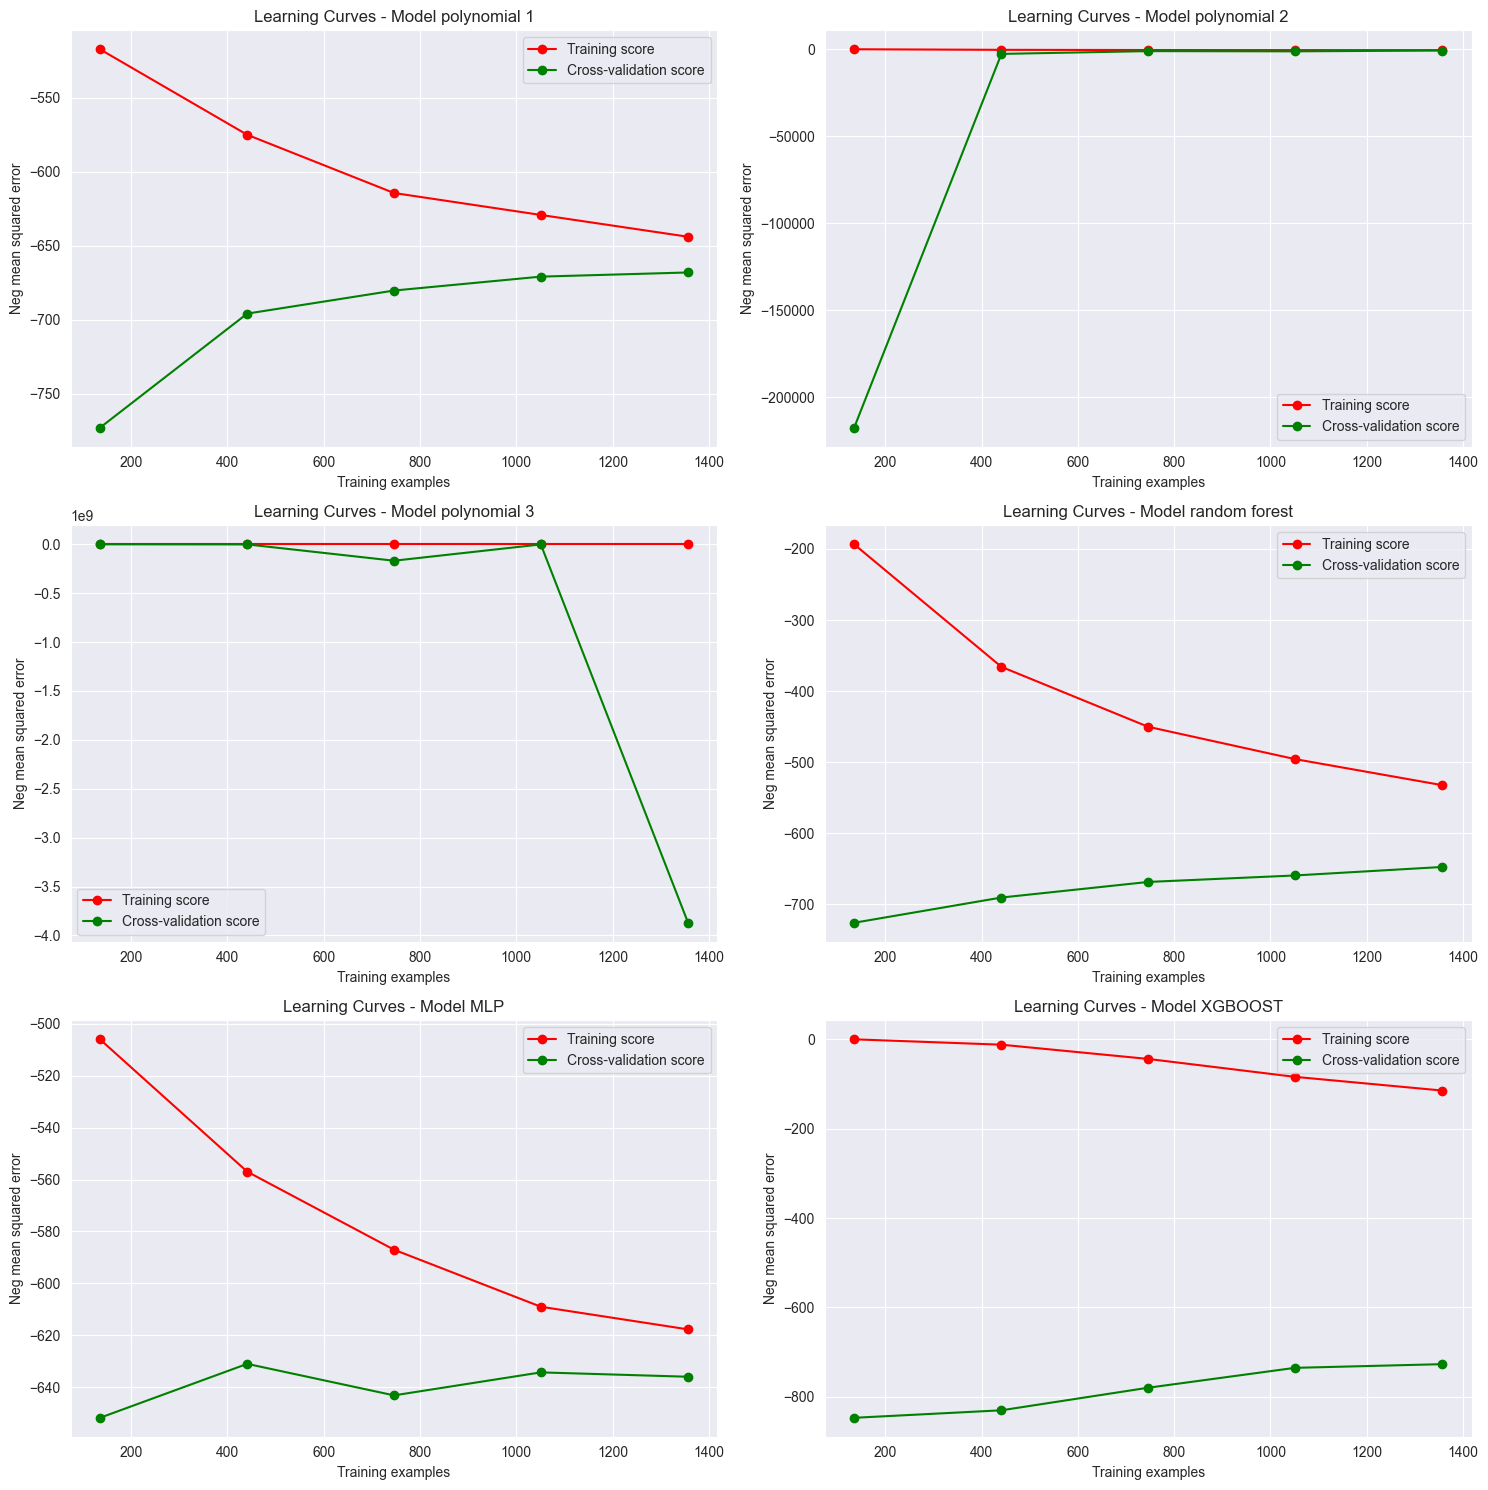

In [22]:
from sklearn.model_selection import learning_curve

def wykres_bledu(model, nazwa_modelu, ax, X=X_train, y=y_train):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
    ax.set_title(f'Learning Curves - {nazwa_modelu}')
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Neg mean squared error')
    ax.legend(loc='best')

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

wykres_bledu(model_pol_1, 'Model polynomial 1', axes[0, 0])
wykres_bledu(model_pol_2, 'Model polynomial 2', axes[0, 1])
wykres_bledu(model_pol_3, 'Model polynomial 3', axes[1, 0])
wykres_bledu(model_rf, 'Model random forest', axes[1, 1])
wykres_bledu(model_mlp,  'Model MLP', axes[2, 0])
wykres_bledu(model_xgb,  'Model XGBOOST', axes[2, 1])

plt.tight_layout()
plt.show()

# Ocena

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_pol_1.fit(X_train, y_train)
model_pol_2.fit(X_train, y_train)
model_pol_3.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_mlp.fit(X_train, y_train)

y_pred_pol_1 = model_pol_1.predict(X_test)
y_pred_pol_2 = model_pol_2.predict(X_test)
y_pred_pol_3 = model_pol_3.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
predictions = model_mlp.predict(X_test)

lista_mse = [mean_squared_error(y_test, y_pred_pol_1), mean_squared_error(y_test, y_pred_pol_2),  mean_squared_error(y_test, y_pred_pol_3), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb), mean_squared_error(y_test, predictions)]
lista_mae = [mean_absolute_error(y_test, y_pred_pol_1), mean_absolute_error(y_test, y_pred_pol_2),  mean_absolute_error(y_test, y_pred_pol_3), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb), mean_absolute_error(y_test, predictions)]
lista_r = [r2_score(y_test, y_pred_pol_1), r2_score(y_test, y_pred_pol_2),  r2_score(y_test, y_pred_pol_3), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb), r2_score(y_test, predictions)]
models= ['linear', 'polynomial (2 degree)', 'polynomial (3 degree)', 'random forest', 'XGBOOST', 'MLP']

error_tab  = pd.DataFrame()
error_tab['Model'] = models
error_tab['MSE'] = lista_mse
error_tab['MAE'] = lista_mae
error_tab['R^2'] = lista_r

In [24]:
error_tab

,Model,MSE,MAE,R^2
0,linear,6.847315e+02,20.453589,0.167330
1,polynomial (2 degree),6.885148e+02,20.190887,0.162729
2,polynomial (3 degree),2.235853e+07,954.344672,-27188.161837
3,random forest,6.371742e+02,19.577231,0.225162
4,XGBOOST,6.989018e+02,20.289920,0.150098
5,MLP,6.883648e+02,19.876907,0.162912


# Dodanie PCA

In [25]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=5)  
regression_model = LinearRegression()

rf_model =  RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)
xgb_model = XGBRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=42)
pipeline1 = Pipeline([('pca', pca), ('regression', regression_model)])
pipeline1.fit(X_train, y_train)
predictions1 = pipeline1.predict(X_test)

pipeline2 = Pipeline([('pca', pca), ('random forest', rf_model)])
pipeline2.fit(X_train, y_train)
predictions2 = pipeline2.predict(X_test)

pipeline3 = Pipeline([('pca', pca), ('xgboost', xgb_model)])
pipeline3.fit(X_train, y_train)
predictions3 = pipeline3.predict(X_test)

lista_mse_pca = [mean_squared_error(y_test, predictions1),'-', '-', mean_squared_error(y_test, predictions2),  mean_squared_error(y_test, predictions3), '-']
error_tab['MSE-PCA'] = lista_mse_pca

In [26]:
error_tab

,Model,MSE,MAE,R^2,MSE-PCA
0,linear,6.847315e+02,20.453589,0.167330,757.933908
1,polynomial (2 degree),6.885148e+02,20.190887,0.162729,-
2,polynomial (3 degree),2.235853e+07,954.344672,-27188.161837,-
3,random forest,6.371742e+02,19.577231,0.225162,710.680254
4,XGBOOST,6.989018e+02,20.289920,0.150098,795.73998
5,MLP,6.883648e+02,19.876907,0.162912,-


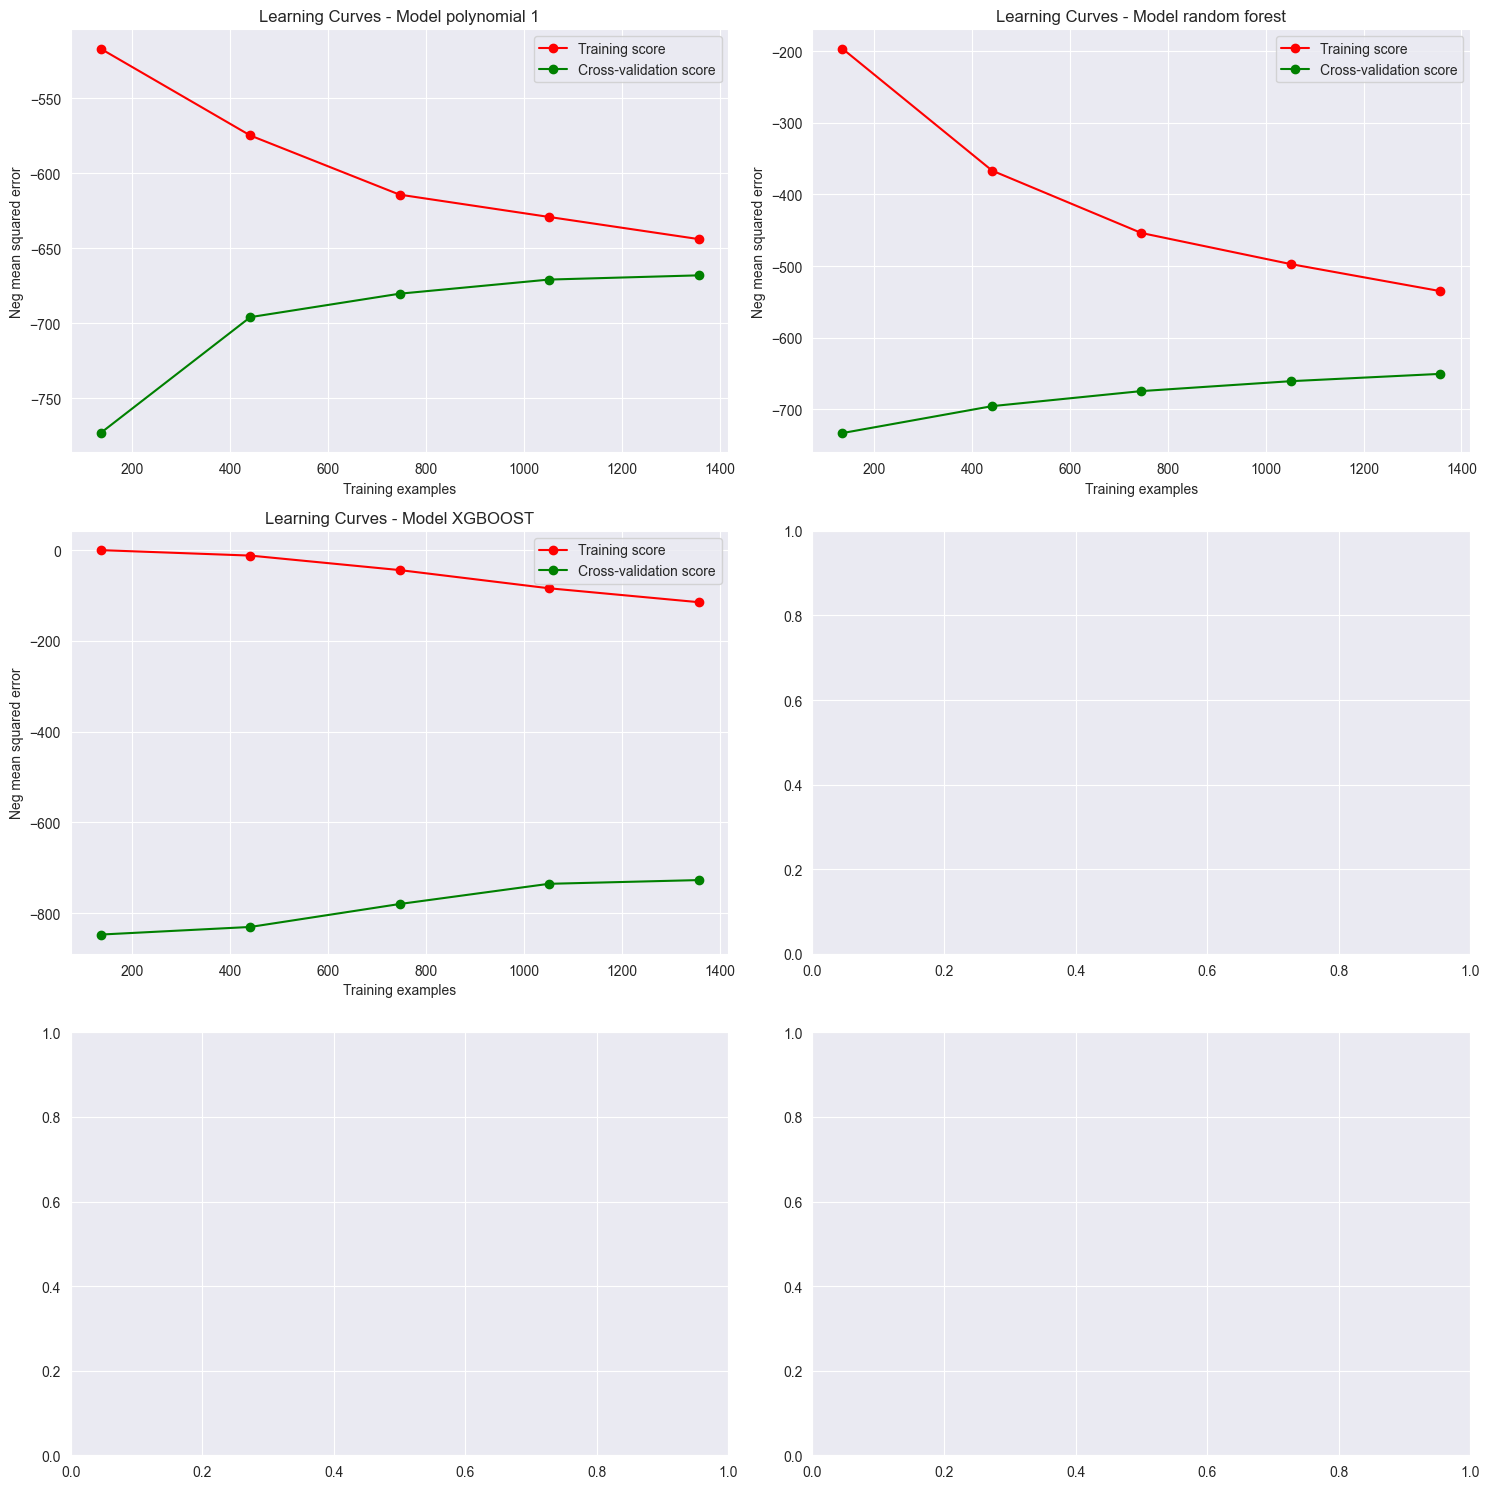

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

wykres_bledu(regression_model, 'Model polynomial 1', axes[0, 0])
wykres_bledu(rf_model, 'Model random forest', axes[0, 1])
wykres_bledu(xgb_model,  'Model XGBOOST', axes[1, 0])

plt.tight_layout()
plt.show()

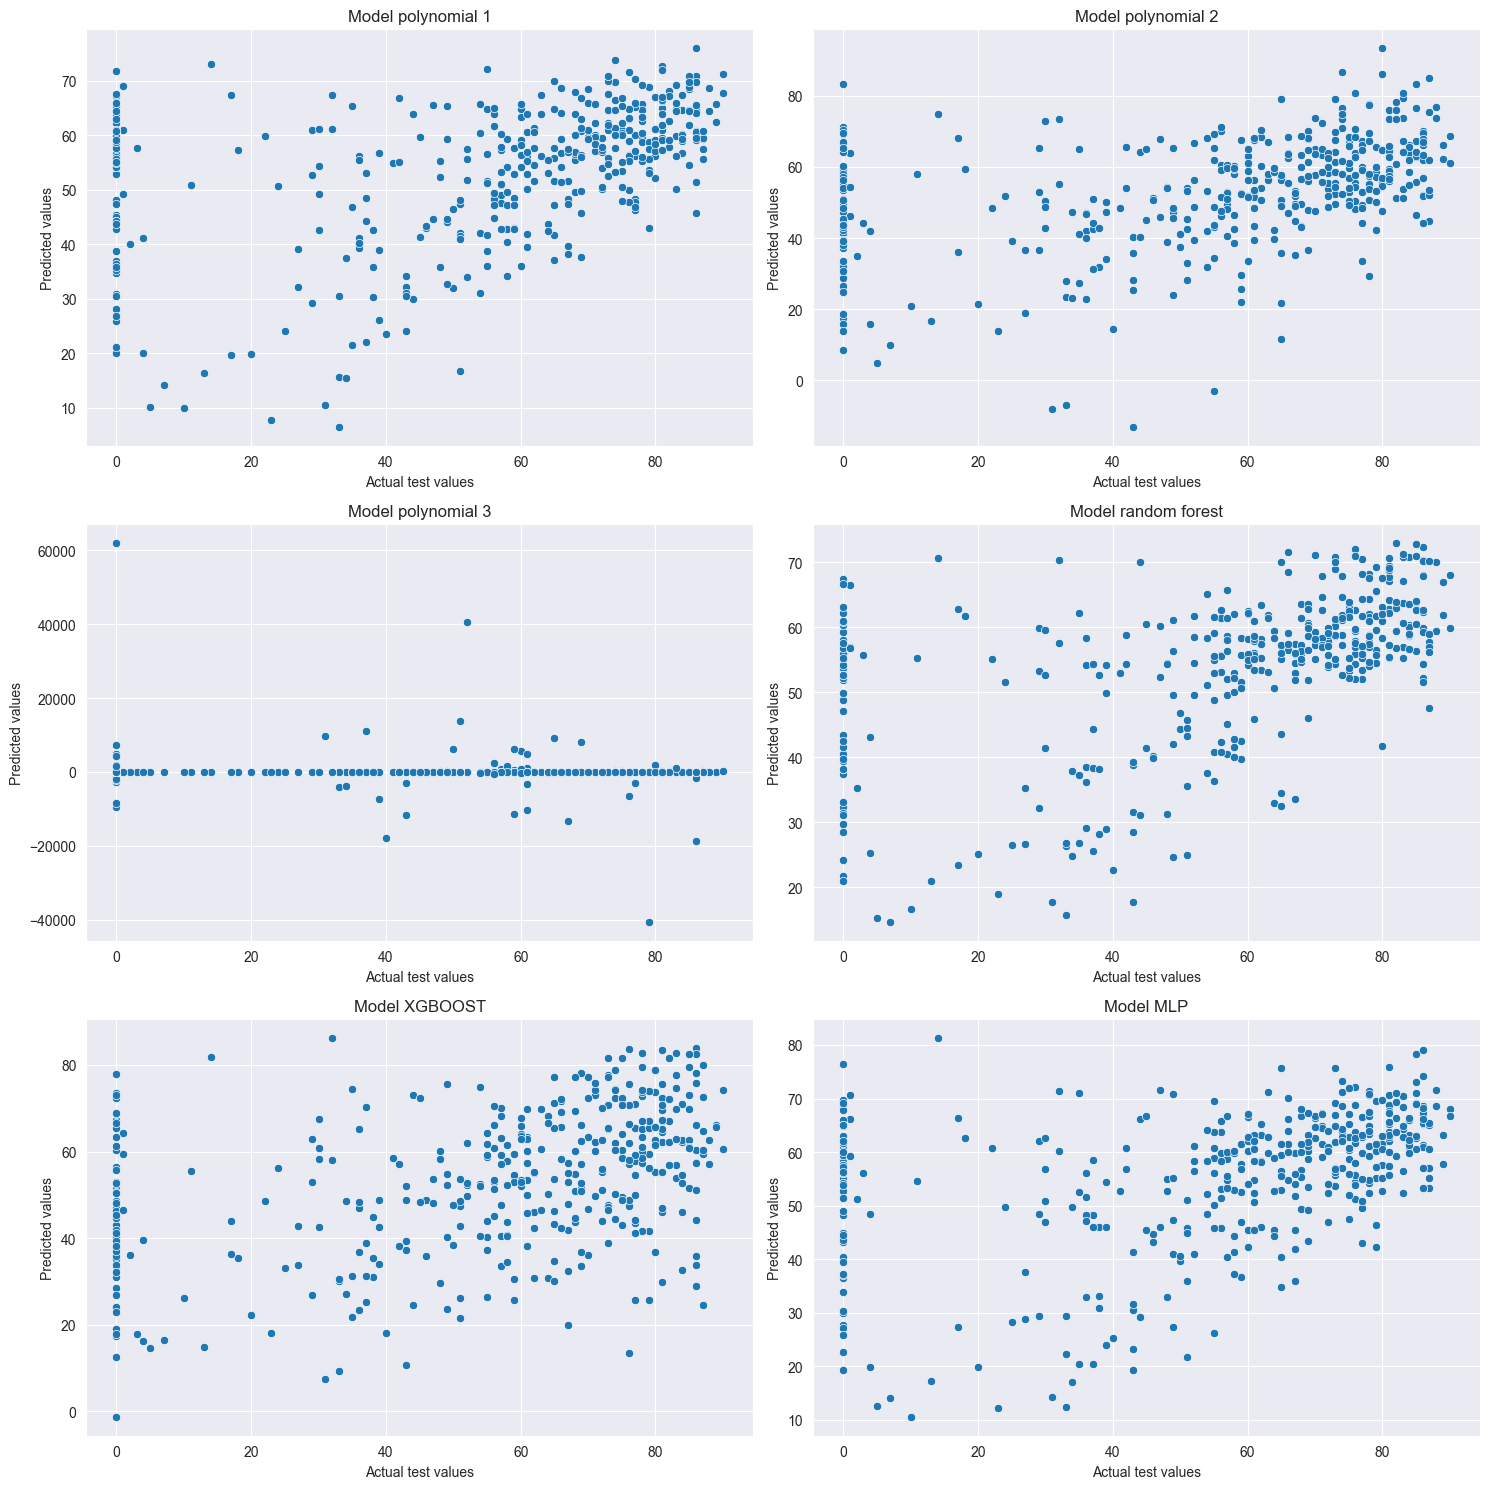

In [28]:
def wykres(y_test, y_pred, model_name, ax):
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    ax.set(xlabel='Actual test values', ylabel=f'Predicted values')
    ax.set_title(f'{model_name}')
    
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

wykres(y_test, y_pred_pol_1, 'Model polynomial 1', axes[0, 0])
wykres(y_test, y_pred_pol_2, 'Model polynomial 2', axes[0, 1])
wykres(y_test, y_pred_pol_3, 'Model polynomial 3', axes[1, 0])
wykres(y_test, y_pred_rf, 'Model random forest', axes[1, 1])
wykres(y_test, y_pred_xgb, 'Model XGBOOST', axes[2, 0])
y_pred = predictions.flatten()
wykres(y_test, y_pred, 'Model MLP', axes[2, 1])

plt.tight_layout()
plt.show()

In [29]:
def tabela(y_pred):
    wyniki = pd.DataFrame()
    wyniki['y_pred'] = y_pred
    wyniki['y_true'] = y_test
    return wyniki

## Wykresy błędów słupkowe

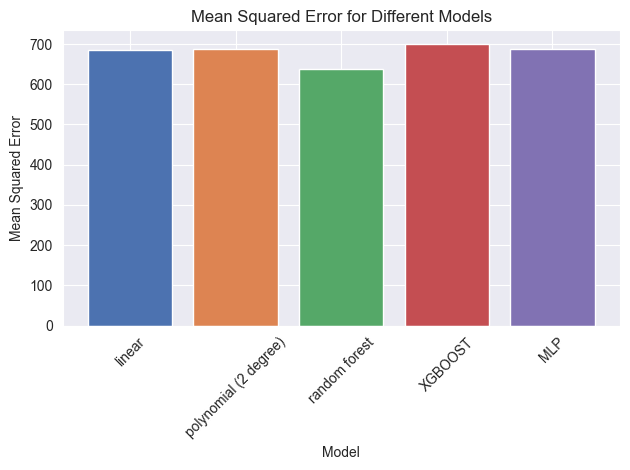

In [35]:
var = error_tab[(error_tab['Model'] != 'polynomial (3 degree)')]
palette = sns.color_palette("deep", len(var))
plt.bar(var['Model'], var['MSE'], color=palette)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()

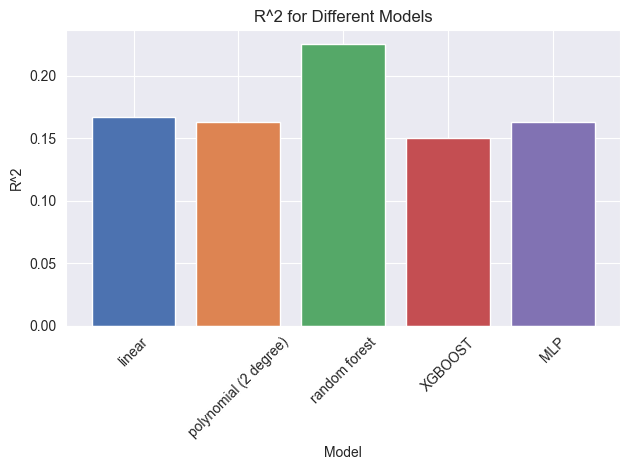

In [36]:
var = error_tab[(error_tab['Model'] != 'polynomial (3 degree)')]
palette = sns.color_palette("deep", len(var))
plt.bar(var['Model'], var['R^2'], color=palette)
plt.xlabel('Model')
plt.ylabel('R^2')
plt.title('R^2 for Different Models')
plt.xticks(rotation=45)
plt.tight_layout()

In [37]:
import pickle
# Zapisanie modelu do pliku
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)